Long short-term memory (LSTM) belongs to the complex areas of Deep Learning. It is not an easy task to get your head around LSTM. It deals with algorithms that try to mimic the human brain the way it operates and to uncover the underlying relationships in the given sequential data.
LSTM networks were designed specifically to overcome the long-term dependency problem faced by recurrent neural networks RNNs (due to the vanishing gradient problem). LSTMs have feedback connections which make them different to more traditional feedforward neural networks.

## **Importing Required Libraries**
We are using the following libraries to complete the task of titanic survival prediction:

* Numpy
* Pandas
* yfinance
* Seaborn
* Matplotlib
* Keras
* Skelarn etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

##**Downloading Dataset using yfinance**

In [ ]:
# Create input field for our desired stock
yf.pdr_override()
stock_name=input("Enter a stock symbol: ")

Enter a stock symbol: NVDA


In [ ]:
ending_date = datetime.now()
starting_date = datetime(ending_date.year - 1, ending_date.month, ending_date.day)
stock_df=yf.download(stock_name,starting_date,ending_date)
print(stock_df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-12  143.690002  145.470001  141.979996  145.050003  144.961349   
2022-09-13  138.020004  139.220001  130.990005  131.309998  131.229736   
2022-09-14  132.539993  132.899994  129.130005  131.279999  131.199738   
2022-09-15  130.149994  132.330002  127.900002  129.289993  129.210953   
2022-09-16  127.419998  132.119995  126.169998  131.979996  131.899323   
...                ...         ...         ...         ...         ...   
2023-09-05  482.230011  488.510010  478.600006  485.480011  485.440033   
2023-09-06  484.410004  485.489990  465.799988  470.609985  470.609985   
2023-09-07  455.250000  463.440002  451.519989  462.410004  462.410004   
2023-09-08  459.420013  466.059998  452.709991  455.720001  455.720001   
2023-09-11  461.480011  461.630005  443.119

## **Exploration of dataset and Visualization of Dataset**

Firstly, we would visualize the closing price history.

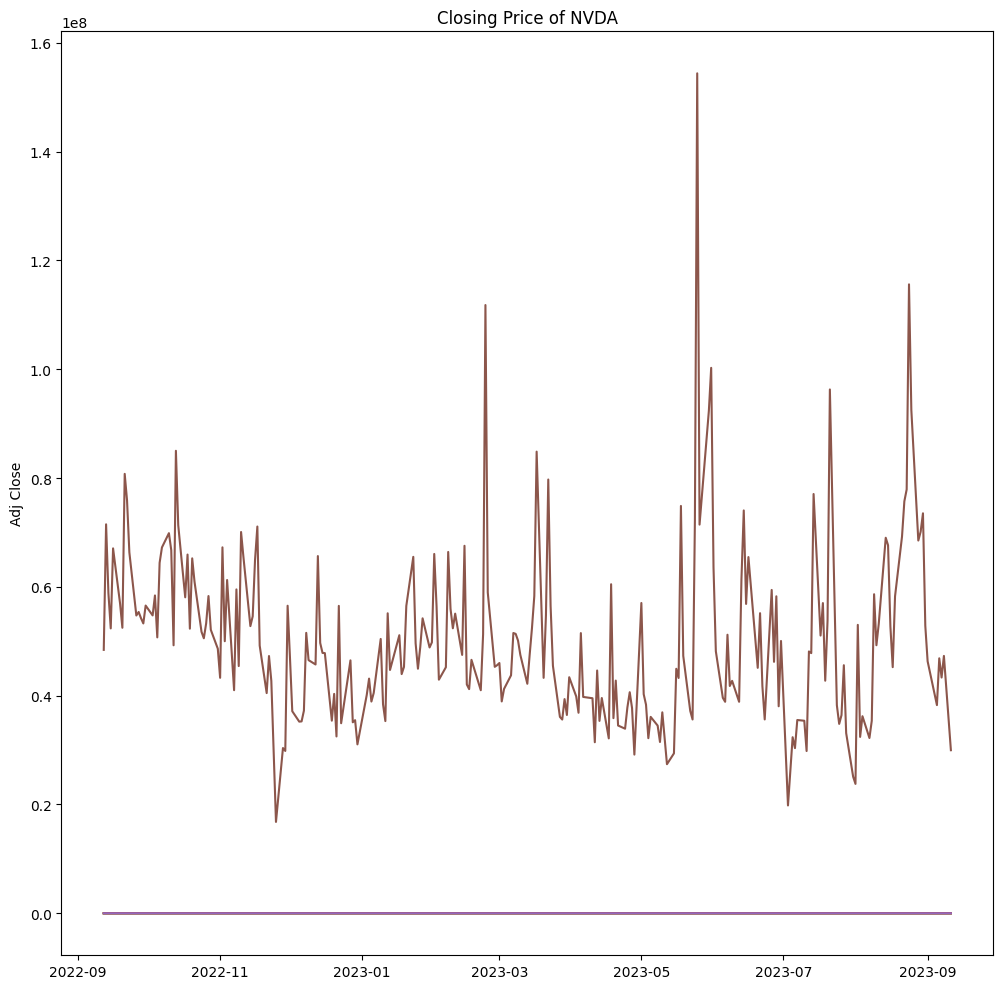

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(stock_df)
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of "+stock_name)
plt.tight_layout()

Now we would visualize total volume of stock v/s each day

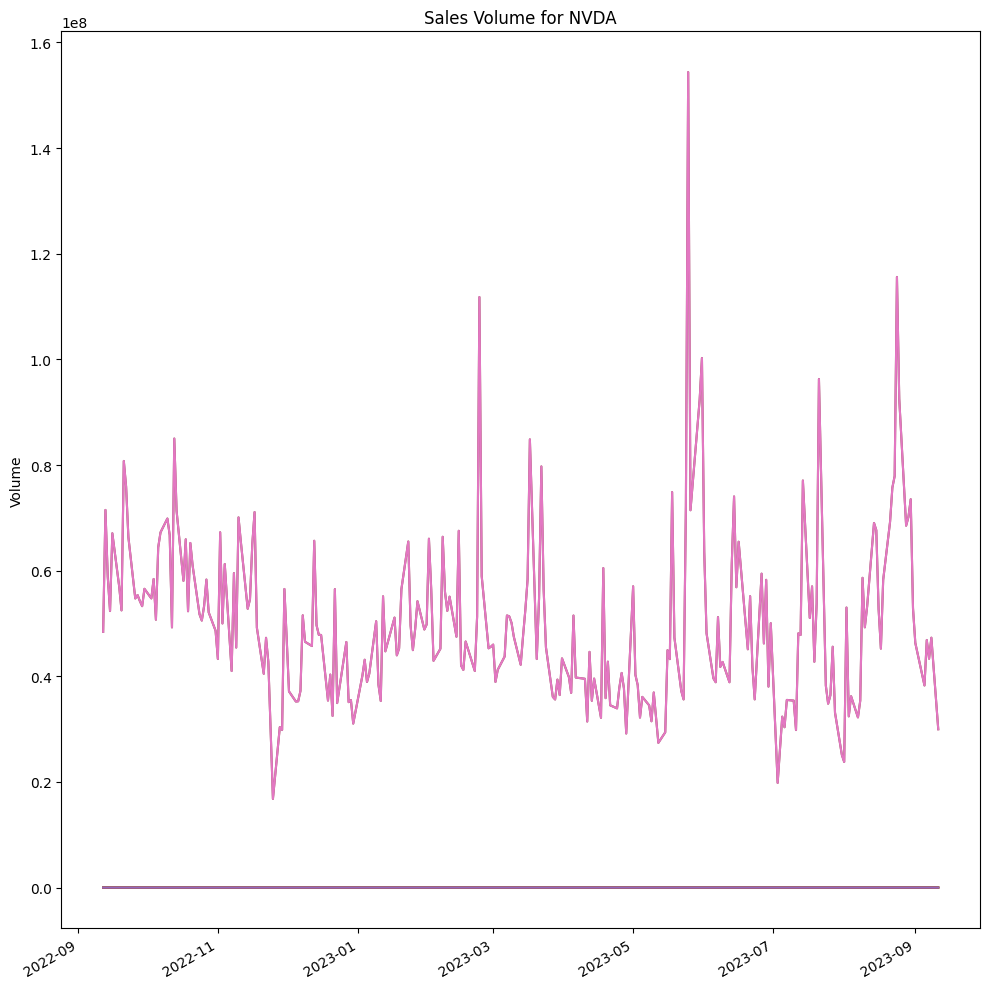

In [ ]:
# Now let's plot the total volume of stock v/s each day
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(stock_df)
stock_df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for "+stock_name)
plt.tight_layout()

Visualization of stock data for 10, 20 and 50 days on single plot.

<Figure size 2000x2000 with 0 Axes>

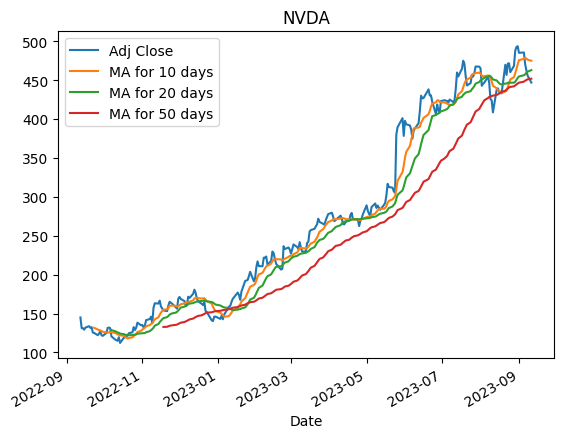

In [ ]:
days = [10, 20, 50]
for i in days:
  column_name = f"MA for {i} days"
  stock_df[column_name] = stock_df['Adj Close'].rolling(i).mean()
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
stock_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title(stock_name)
fig.tight_layout()

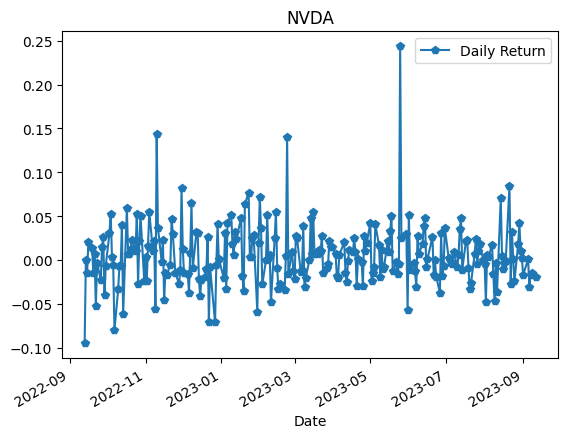

In [ ]:
# We will use pct_change to find the percent change for each day
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change()
fig.set_figheight(15)
fig.set_figwidth(20)
stock_df['Daily Return'].plot( legend=True,marker='p')
plt.title(stock_name)
fig.tight_layout()

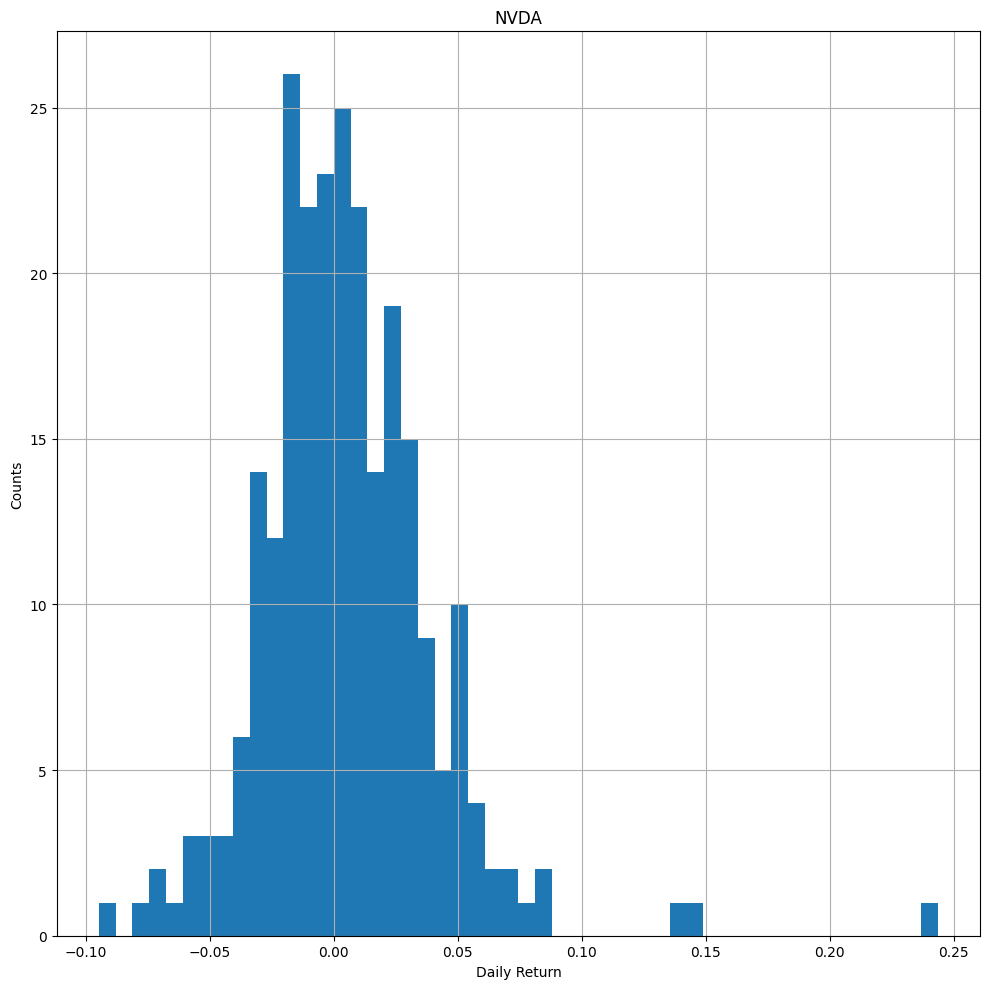

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot()
stock_df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(stock_name)
plt.tight_layout()

Required data is fetched from yahoo directory using get_data_yahoo() function

In [ ]:
# Get the stock quote
stock_df = pdr.get_data_yahoo(stock_name, start='2013-01-01', end=datetime.now())
# Show the data
stock_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,3.140000,3.182500,3.127500,3.180000,2.936237,47883600
2013-01-03,3.180000,3.217500,3.145000,3.182500,2.938545,29888800
2013-01-04,3.187500,3.297500,3.177500,3.287500,3.035496,52496800
2013-01-07,3.285000,3.295000,3.170000,3.192500,2.947778,61073200
2013-01-08,3.200000,3.210000,3.100000,3.122500,2.883144,46642400
...,...,...,...,...,...,...
2023-09-05,482.230011,488.510010,478.600006,485.480011,485.440033,38265300
2023-09-06,484.410004,485.489990,465.799988,470.609985,470.609985,46867000
2023-09-07,455.250000,463.440002,451.519989,462.410004,462.410004,43333000


Now, we would visualize the trend of 'Closing Price' of enetered company stock. further we would create the model to predict the closing price of that company.

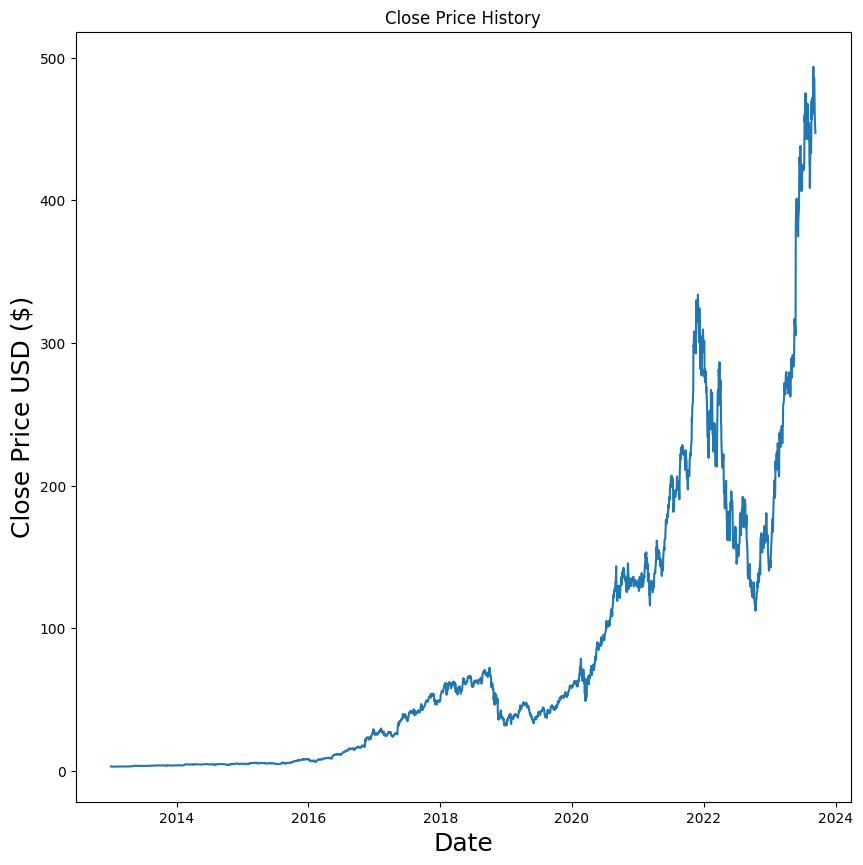

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Close Price History')
plt.plot(stock_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## **Data Prepration**
Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include collecting, cleaning, and labeling raw data into a form suitable for machine learning (ML) algorithms and then exploring and visualizing the data.

In [ ]:
# Create a new dataframe with only the 'Close column
stock_data = stock_df.filter(['Close'])
dataset = stock_data.values
training_len = int(np.ceil( len(dataset) * .95 ))
training_len

2557

#Scaling of data

In [ ]:
# Scale the data
scaling = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaling.fit_transform(dataset)
scaled_dataset

array([[3.77124249e-04],
       [3.82220148e-04],
       [5.96263470e-04],
       ...,
       [9.36520910e-01],
       [9.22883290e-01],
       [9.05422038e-01]])

## **Train-Test Split the dataset**

In [ ]:
# Create the training data set
train_data = scaled_dataset[0:int(training_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([3.77124249e-04, 3.82220148e-04, 5.96263470e-04, 4.02605689e-04,
       2.59909817e-04, 1.17214431e-04, 1.27406716e-04, 1.17214431e-04,
       1.12118046e-04, 0.00000000e+00, 5.60592661e-05, 1.37599487e-04,
       9.68293763e-05, 6.62515506e-05, 7.64443212e-05, 1.07021661e-04,
       2.19139707e-04, 3.21064983e-04, 1.83465982e-04, 1.73273211e-04,
       1.42695872e-04, 1.98754652e-04, 9.17329910e-05, 2.34428377e-04,
       1.83465982e-04, 1.57984542e-04, 1.98754652e-04, 2.70102588e-04,
       2.29332478e-04, 1.98754652e-04, 3.82220148e-04, 3.82220148e-04,
       2.95584028e-04, 2.03851037e-04, 1.57984542e-04, 2.75198973e-04,
       1.63080927e-04, 1.98754652e-04, 3.15969083e-04, 3.46546423e-04,
       3.72027863e-04, 3.46546423e-04, 4.17894359e-04, 4.12797974e-04,
       3.97509304e-04, 4.28086643e-04, 3.66931478e-04, 3.87316533e-04,
       3.87316533e-04, 3.92412918e-04, 3.36354138e-04, 2.90487643e-04,
       2.49717533e-04, 3.26161368e-04, 2.24236092e-04, 2.54813432e-04,
     

##**Build a LSTM Model**


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2497/2497 [==============================] - 86s 33ms/step - loss: 7.1713e-04


In [ ]:
# Create the testing data set
test_data = scaled_dataset[training_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

##**Prediction of stock Price values**

In [ ]:
# Get the models predicted price values
prediction = model.predict(x_test)
prediction = scaling.inverse_transform(prediction)

5/5 [==============================] - 2s 35ms/step


##**Visualization of the Model**

<ipython-input-27-2cfde3e2c9cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = prediction


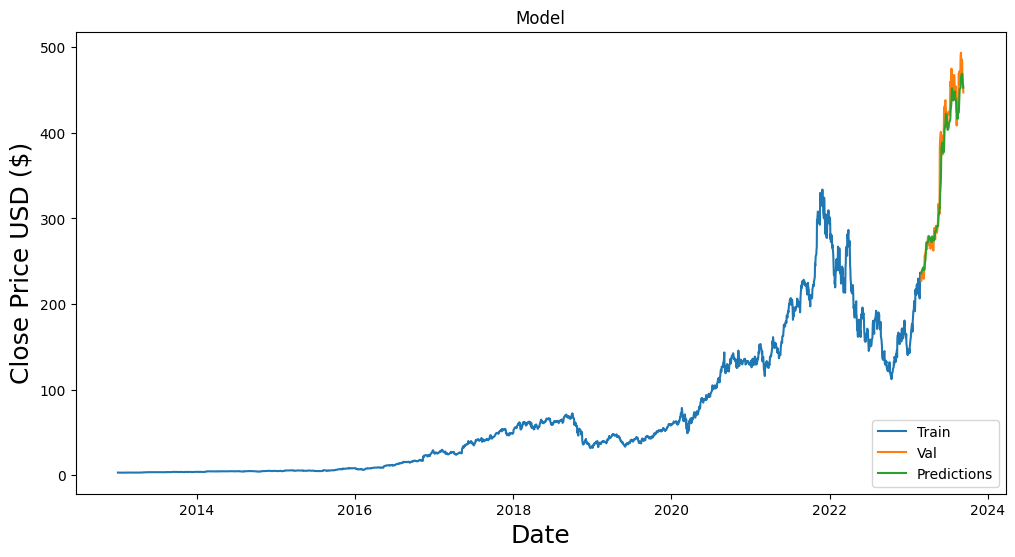

In [ ]:
# Plot the data
training = stock_data[:training_len]
validation = stock_data[training_len:]
validation['Predictions'] = prediction
# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(training['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
validation

,Close,Predictions
Date,,
2023-03-01,226.979996,235.865311
2023-03-02,233.139999,237.268967
2023-03-03,238.899994,238.393097
2023-03-06,235.539993,240.182175
2023-03-07,232.880005,241.289413
...,...,...
2023-09-05,485.480011,468.812378
2023-09-06,470.609985,469.040985
2023-09-07,462.410004,465.504578


##**Model Evaluation**
Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

In [ ]:
# Get the root mean squared error (RMSE)
root_mse = np.sqrt(np.mean(((prediction - y_test) ** 2)))
root_mse

18.223395002325553